In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model #used for importing models

taking only 1 dependent and independent variable(price and area)
create csv file,


In [45]:
df=pd.DataFrame({
    'area':[2600,3000,3200,3600,4000],
    'price':[550000,660000,680000,710000,730000]
})

In [46]:
# df=pd.read_csv("house.csv")
df

,area,price
0,2600,550000
1,3000,660000
2,3200,680000
3,3600,710000
4,4000,730000


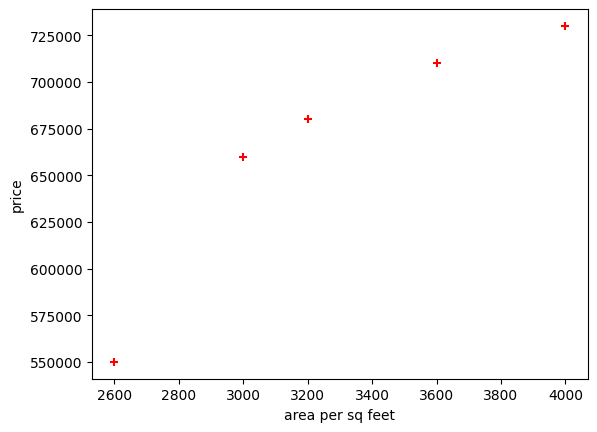

In [47]:
%matplotlib inline
plt.xlabel('area per sq feet')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [48]:
reg=linear_model.LinearRegression()#reg is object for regression model
reg.fit(df[['area']],df.price)#fit is a function that trains the model using the ava points

LinearRegression()

In [49]:
reg.predict([[3300]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([668390.4109589])

In [50]:
m=reg.coef_

In [51]:
b=reg.intercept_
b

273972.602739726

Verification of obtained prediction

In [52]:
x=3300
y=m*x+b #m is from coef, b is from intercept, x is area
y

array([668390.4109589])

write the predicted value in the csv file

In [53]:
reg.predict([[5000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([871575.34246575])

In [54]:
# d=pd.read_csv('')
d=pd.DataFrame({
    'area':[2000,4900,3500]
})
d.head(3)
p=reg.predict(d)
d['prices']=p
d.to_csv("area.csv")#saves it temp in the files part on the left side

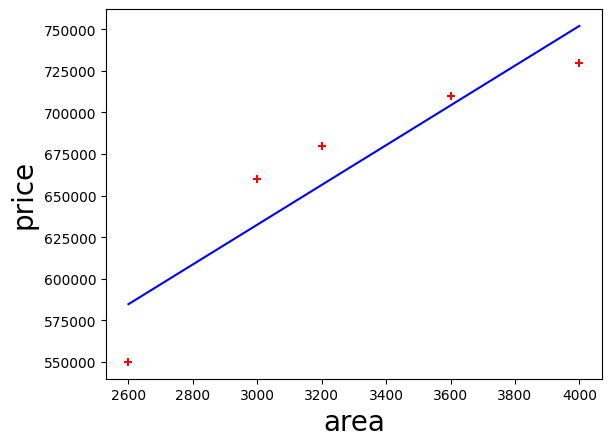

In [55]:
%matplotlib inline
plt.xlabel('area', fontsize=20)
plt.ylabel('price',fontsize=20)
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')

LINEAR REGRESSION WITH MULTIPLE VARIABLES

In [56]:
df=pd.DataFrame({
    'area':[2600,3000,3200,3600,4000],
    'price':[550000,660000,680000,710000,730000],
    'bedrooms':[3,4,np.NaN,3,5],
    'age':[20,1555,18,30,8]
})
#age of building
# more area, bedrooms more price
# more age, less price
df

,area,price,bedrooms,age
0,2600,550000,3.0,20
1,3000,660000,4.0,1555
2,3200,680000,NaN,18
3,3600,710000,3.0,30
4,4000,730000,5.0,8


price=m1*area +m2 *bedrooms+m3*age+b

shd do data cleaning, removing the null val

In [57]:
import math
mediab=math.floor(df.bedrooms.median())
mediab

3

In [58]:
df.bedrooms=df.bedrooms.fillna(mediab)

In [59]:
df

,area,price,bedrooms,age
0,2600,550000,3.0,20
1,3000,660000,4.0,1555
2,3200,680000,3.0,18
3,3600,710000,3.0,30
4,4000,730000,5.0,8


In [60]:
reg=linear_model.LinearRegression()#reg is object for regression model
reg.fit(df[['area','bedrooms','age']],df.price)#fit is a function that trains the model using the ava points

LinearRegression()

In [61]:
reg.predict([[3300,10,5]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([469855.17296142])

In [62]:
reg.coef_

array([   163.96845142, -29059.97406241,     41.84421565])

In [63]:
reg.intercept_

219149.80282185035